# ISLP - Chapter 12 - Exercise 10
### Author: pzuehlke

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

__10 (a):__ We begin by setting the relevant variables:

In [2]:
np.random.seed(0)

n_samples_per_class = 20
n_classes = 3
n = n_samples_per_class * n_classes  # total samples
p = 50  # number of features

We will draw the data from normal distributions having standard deviation $ 1 $
and means $ 0 $, $ 3 $ and $ 6 $, to ensure a clear separation (as required in
item (b)).

In [3]:
class1 = np.random.normal(loc=0, scale=1, size=(n_samples_per_class, p))
class2 = np.random.normal(loc=3, scale=1, size=(n_samples_per_class, p))
class3 = np.random.normal(loc=6, scale=1, size=(n_samples_per_class, p))

Finally, we join the three classes into one dataset and store the true labels:

In [4]:
data = np.vstack([class1, class2, class3])
true_labels = np.repeat(range(n_classes), n_samples_per_class)
print(true_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


__10 (b):__

In [5]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca.shape

(60, 2)

Let's compute the variance explained by these two components:

In [6]:
variance_explained = pca.explained_variance_ratio_
print(f"Proportion of variance explained by first two components: {sum(variance_explained):.2%} .")

Proportion of variance explained by first two components: 87.92% .


It is remarkable that even though the original data has $ 50 $ features, we can
explain almost all of the variance using only two principal components. Let's
plot the data using their first two principal component scores:

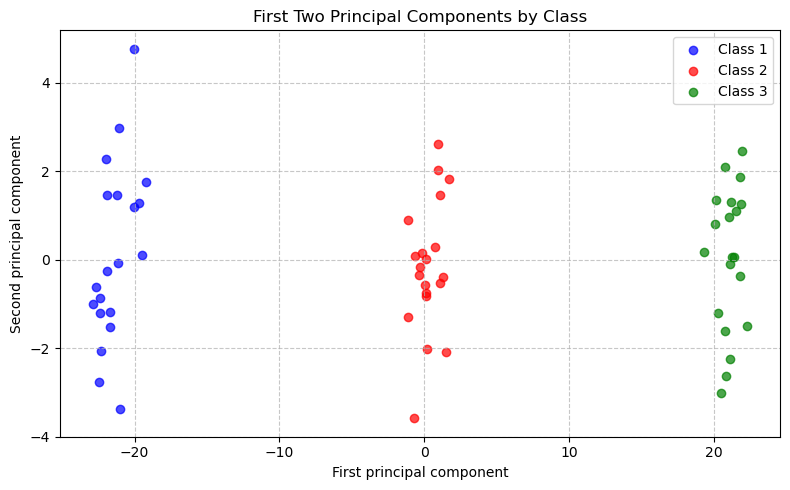

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = ["blue", "red", "green"]
for i in range(n_classes):
    ax.scatter(data_pca[true_labels == i, 0], data_pca[true_labels == i, 1], 
               c=colors[i], label=f"Class {i + 1}", alpha=0.7)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_title("First Two Principal Components by Class")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.7)
fig.tight_layout()
plt.show()


__10 (c):__ We use sklearn's `KMeans`. Here `n_init` controls the number of
times to initialize the classes (step 1 of Algorithm 12.2). Following the book's
recommendation,  we choose a large value for this parameter to make sure we
don't get stuck in a local minimum:

In [8]:
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init=100)
kmeans_3_model = kmeans_3.fit(data)
cluster_labels_3 = kmeans_3_model.predict(data)

We now use `crosstab` as in the hint to compare the labels furnished by $ K
$-means to the true labels. We can see that $ K $-means nails the true labels
perfectly (up to a permutation):

In [9]:
cross_tab_3 = pd.crosstab(cluster_labels_3, true_labels, 
                          rownames=["K-means (K = 3)"], colnames=["true labels"])
print(cross_tab_3)

true labels       0   1   2
K-means (K = 3)            
0                 0  20   0
1                 0   0  20
2                20   0   0


__10 (d):__ We just repeat the work in item (c) with $ 2 $ in place of $ 3 $:

In [10]:
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=100)
kmeans_2_model = kmeans_2.fit(data)
cluster_labels_2 = kmeans_2_model.predict(data)

In [11]:
cross_tab_2 = pd.crosstab(cluster_labels_2, true_labels, 
                          rownames=["K-means (K = 2)"], colnames=["true labels"])
print(cross_tab_2)

true labels       0   1   2
K-means (K = 2)            
0                 0  20  20
1                20   0   0


We can see that for $ K = 2 $, two of the classes got grouped together, but are
still clearly separated from the third class, which is the best we can hope for
with only $ 2 $ clusters.

__10 (e):__ With $ K = 4 $, two of the true classes constitute their own
separate clusters, while the remaining class gets split into two parts. Again,
this is the best we can hope for with a number of clusters different from the
true number of classes.

In [12]:
kmeans_4 = KMeans(n_clusters=4, random_state=0, n_init=100)
kmeans_4_model = kmeans_4.fit(data)
cluster_labels_4 = kmeans_4_model.predict(data)

In [13]:
cross_tab_4 = pd.crosstab(cluster_labels_4, true_labels, 
                          rownames=["K-means (K = 4)"], colnames=["true labels"])
print(cross_tab_4)

true labels       0   1   2
K-means (K = 4)            
0                 0   0  20
1                20   0   0
2                 0   6   0
3                 0  14   0


__10 (f):__ The results are exactly the same as obtained by using the $ 50 $
predictors: the true classes are perfectly identified by $ K $-means, up to a
permutation of the labels.

In [19]:
kmeans_pca = KMeans(n_clusters=3, random_state=0, n_init=100)
kmeans_pca_model = kmeans_pca.fit(data)
pca_cluster_labels = kmeans_pca_model.predict(data)

In [21]:
crosstab_pca = pd.crosstab(pca_cluster_labels, true_labels,
                           rownames=["K-means for PCA"], colnames=["true labels"])
print(crosstab_pca)

true labels       0   1   2
K-means for PCA            
0                 0  20   0
1                 0   0  20
2                20   0   0


__10 (g):__ The results are exactly the same as without scaling: the true
classes are perfectly separated by $ K $-means, up to a permutation of the
labels.

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
kmeans_3_scaled = KMeans(n_clusters=3, random_state=0, n_init=100)
kmeans_3_scaled_model = kmeans_3_scaled.fit(data_scaled)
cluster_labels_3_scaled= kmeans_3_scaled_model.predict(data_scaled)

In [18]:
cross_tab_3 = pd.crosstab(cluster_labels_3_scaled, true_labels, 
                          rownames=["K-means (K = 3)"], colnames=["true labels"])
print(cross_tab_3)

true labels       0   1   2
K-means (K = 3)            
0                 0  20   0
1                 0   0  20
2                20   0   0
